**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
import catboost as catb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score, learning_curve, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                            accuracy_score, classification_report, plot_confusion_matrix, \
                            plot_precision_recall_curve, precision_recall_curve,
                            plot_roc_curve, f1_score, precision_score, recall_score)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Пути к директориям и файлам**

In [2]:
TRAIN_DATASET_PATH = './credit-default/train.csv'
TEST_DATASET_PATH = './credit-default/test.csv'
RESULT_PATH = './credit-default/result.csv'

**Загрузка данных**

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


### обзор датасета

In [4]:
df_train.shape

(7500, 17)

In [5]:
df_train.iloc[10]

Home Ownership                       Home Mortgage
Annual Income                                  NaN
Years in current job                      < 1 year
Tax Liens                                      0.0
Number of Open Accounts                        7.0
Years of Credit History                       11.5
Maximum Open Credit                       256322.0
Number of Credit Problems                      0.0
Months since last delinquent                   NaN
Bankruptcies                                   0.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                       220858.0
Current Credit Balance                    187492.0
Monthly Debt                               14592.0
Credit Score                                   NaN
Credit Default                                   0
Name: 10, dtype: object

In [6]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [7]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [8]:
df_test.shape

(2500, 16)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

- Home Ownership - домовладение
- Annual Income - годовой доход
- Years in current job - количество лет на текущем месте работы
- Tax Liens - налоговые обременения
- Number of Open Accounts - количество открытых счетов
- Years of Credit History - количество лет кредитной истории
- Maximum Open Credit - наибольший открытый кредит
- Number of Credit Problems - количество проблем с кредитом
- Months since last delinquent - количество месяцев с последней просрочки платежа
- Bankruptcies - банкротства
- Purpose - цель кредита
- Term - срок кредита
- Current Loan Amount - текущая сумма кредита
- Current Credit Balance - текущий кредитный баланс
- Monthly Debt - ежемесячный долг
- Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Функции

In [11]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('Confusion Matrix\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize = (10, 6))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()
    
def show_learning_curve_plot(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                           cv=cv,
                                                           scoring='f1',
                                                           train_sizes = train_sizes,
                                                           n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(15, 8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.title(f'Learning curves ({type(estimator).__name__})')
    plt.xlabel('Trainig examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()    

### Обработка пропусков

In [12]:
def null_processing(data):
    feature_names = ['Annual Income', 'Months since last delinquent', 'Credit Score']
    for feature in feature_names:
        data_mean = data[~((data[feature].isna()) | (data[feature] == 0))][feature].mean()
        data.loc[(data[feature].isna()), [feature]] = data_mean
    
    return data

In [13]:
df_train = null_processing(df_train)
df_test = null_processing(df_test)

In [14]:
#удаление строк где целевая переменная = 0 и есть значения Nan
def column_drop(data):
    columns_drop_ = ['Years in current job', 'Bankruptcies']
    for col in columns_drop_:
        data = data[~((data[col].isna()) & (data['Credit Default'] == 0))]
    return data

In [15]:
df_train = column_drop(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7256 entries, 1 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7256 non-null   object 
 1   Annual Income                 7256 non-null   float64
 2   Years in current job          7119 non-null   object 
 3   Tax Liens                     7256 non-null   float64
 4   Number of Open Accounts       7256 non-null   float64
 5   Years of Credit History       7256 non-null   float64
 6   Maximum Open Credit           7256 non-null   float64
 7   Number of Credit Problems     7256 non-null   float64
 8   Months since last delinquent  7256 non-null   float64
 9   Bankruptcies                  7252 non-null   float64
 10  Purpose                       7256 non-null   object 
 11  Term                          7256 non-null   object 
 12  Current Loan Amount           7256 non-null   float64
 13  Cur

#### преобразование типов 

In [16]:
def type_conversion(data):
    # Home Ownership
    map_home_ownership = {
        'Have Mortgage' : 0,
        'Rent' : 1,
        'Own Home': 2,
        'Home Martgage': 3,
    }
    
    data['Home Ownership'] = data['Home Ownership'].map(map_home_ownership)
    
    # Years in current job
    map_years_in_current_job = {
        '< 1 year' : 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
    }
    
    data['Years in current job'] = data['Years in current job'].map(map_years_in_current_job)
    
    # Purpose
    map_purpose = {
        "renewable energy" : 14,
        "vacation": 13,
        "educational expenses": 12,
        "moving": 11,
        "wedding": 10,
        "small business" : 9,
        "buy house" : 8,
        "take a trip" : 7,
        "major purchase" : 6,
        "medical bills" : 5,
        "buy a car" : 4,
        "business loan" : 3,
        "home improvements" : 2,
        "other" : 1,
        "debt consolidation" : 0,
    }
    
    data['Purpose'] = data['Purpose'].map(map_purpose)
    
    #Term
    map_term = {
        'Short Term' : 0,
        'Long Term' : 1,
    }
    
    data['Term'] = data['Term'].map(map_term)
    
    # все Nan переводим в 0
    data = data.fillna(0)
    
    return data

In [17]:
df_train = type_conversion(df_train)
df_test = type_conversion(df_test)

In [18]:
df_train.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

### Осмотр признаков

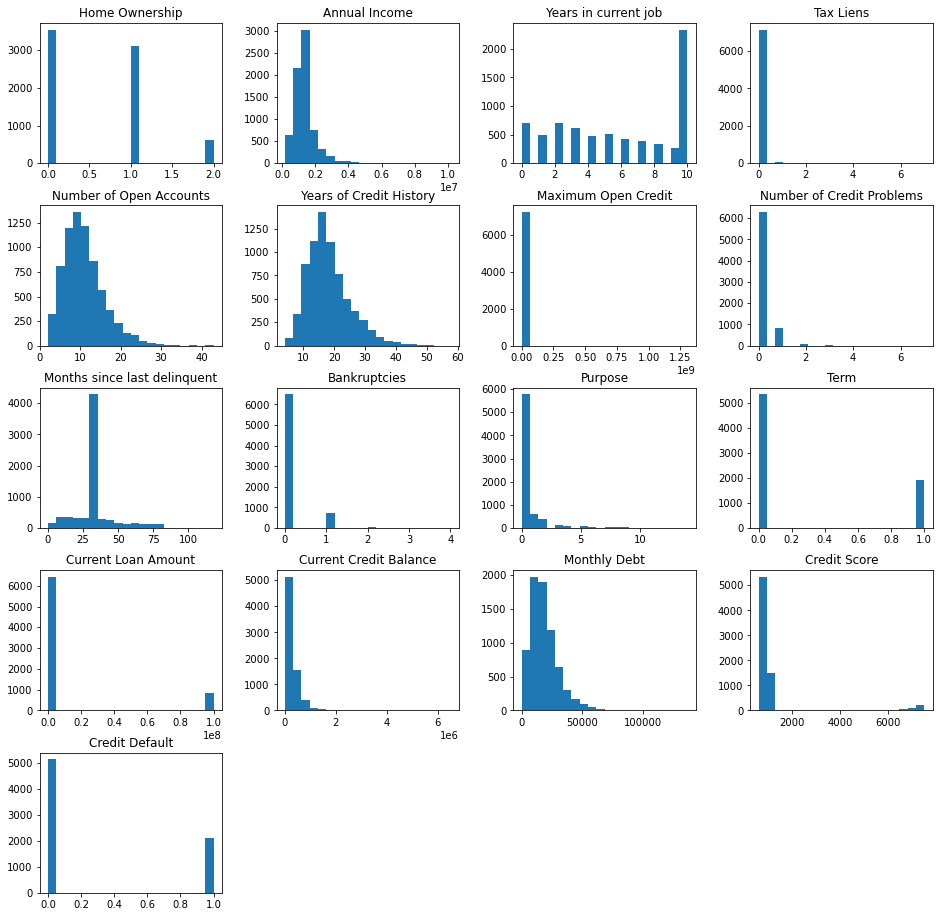

In [19]:
df_train.hist(figsize=(16,16), bins=20, grid=False);

In [20]:
X = df_train[df_train.columns.drop('Credit Default')]
y = df_train['Credit Default']

#### CatB

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

catb_model = catb.CatBoostClassifier(
                    auto_class_weights='Balanced',
                    silent=True,
                    random_state=11)

catb_model.fit(X_train, y_train)

y_train_pred = catb_model.predict(X_train)
y_test_pred = catb_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test.values, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3588
           1       0.79      0.88      0.83      1491

    accuracy                           0.90      5079
   macro avg       0.87      0.89      0.88      5079
weighted avg       0.90      0.90      0.90      5079

TEST

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.53      0.57      0.55       622

    accuracy                           0.73      2177
   macro avg       0.68      0.68      0.68      2177
weighted avg       0.74      0.73      0.74      2177

Confusion Matrix

col_0     0    1
row_0           
0      1242  313
1       267  355


### Важность признаков<a class="anchor" id="feature_importances"></a>

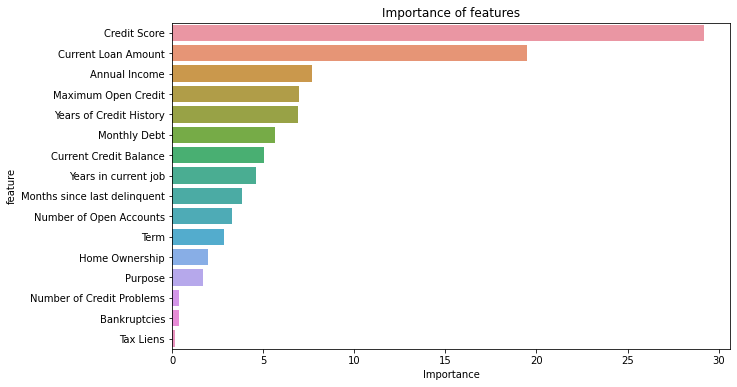

In [22]:
important_features_top = show_feature_importances(X_train.columns, catb_model.feature_importances_, get_top=15)

In [23]:
important_features_top

['Credit Score',
 'Current Loan Amount',
 'Annual Income',
 'Maximum Open Credit',
 'Years of Credit History',
 'Monthly Debt',
 'Current Credit Balance',
 'Years in current job',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Term',
 'Home Ownership',
 'Purpose',
 'Number of Credit Problems',
 'Bankruptcies']

### Снижение степени переобучения 

In [24]:
params = {'n_estimators': [50, 100, 200, 500, 700, 1000, 1200, 1500],
         'max_depth': [3, 5, 7]}

In [25]:
cv = StratifiedKFold(n_splits=3, random_state=17, shuffle=True)

In [38]:
rand_search = RandomizedSearchCV(catb_model, params, scoring='f1', cv=cv, n_jobs=-1)
rand_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000020CD490B100>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='f1')

In [39]:
rand_search.best_params_

{'n_estimators': 500, 'max_depth': 3}

In [40]:
rand_search.best_score_

0.5644133941860957

In [29]:
disbalance = y_train.value_counts()[0]  /y_train.value_counts()[1]
disbalance

2.4064386317907447

In [57]:
frozen_params = {
    'class_weights': [1, disbalance],
    'silent': True,
    'random_state': 17,
    'eval_metric': 'F1',
    'early_stopping_rounds': 20
}

In [71]:
catb_final = catb.CatBoostClassifier(**frozen_params,
                                    iterations=100,
                                    max_depth=3,
                                    reg_lambda=0.01
                                    )
catb_final.fit(X_train[important_features_top], y_train)

y_train_preds = catb_final.predict(X_train[important_features_top])
y_test_preds = catb_final.predict(X_test)

get_classification_report(y_train, y_train_preds, y_test.values, y_test_preds)

TRAIN

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3588
           1       0.53      0.59      0.56      1491

    accuracy                           0.72      5079
   macro avg       0.67      0.68      0.68      5079
weighted avg       0.73      0.72      0.73      5079

TEST

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1555
           1       0.51      0.61      0.56       622

    accuracy                           0.72      2177
   macro avg       0.67      0.69      0.68      2177
weighted avg       0.74      0.72      0.73      2177

Confusion Matrix

col_0     0    1
row_0           
0      1195  360
1       244  378


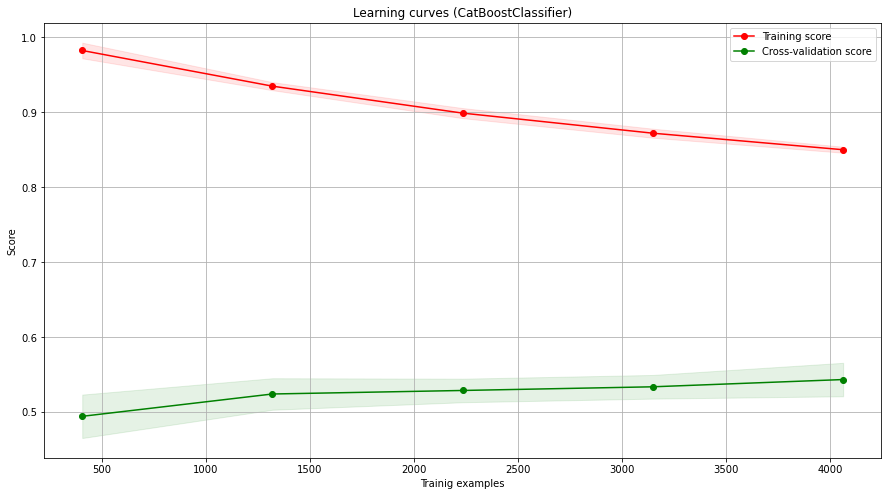

In [72]:
show_learning_curve_plot(catb_model, X_train, y_train)

# test

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   float64
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   float64
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   int64  
 11  Term                          2500 non-null   int64  
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [74]:
samples = pd.read_csv('./credit-default/sample_submission.csv')
predict = pd.DataFrame(index = samples['Id'])

In [75]:
y_pred_final = catb_final.predict(df_test)
predict['Credit Default'] = y_pred_final
predict.to_csv(RESULT_PATH, sep=',')
predict

,Credit Default
Id,
0,0
1,0
2,1
3,0
4,0
...,...
2495,0
2496,0
2497,0
